In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import tokenizers

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls input/

sample_submission.csv  test.csv  train.csv  train_fold.csv  train_folds.csv


In [270]:
tmp = pd.read_csv("input/train_folds.csv")

In [13]:
for i in range(5):
    print(tmp.query("kfold == @i")["sentiment"].value_counts())

neutral     2223
positive    1717
negative    1557
Name: sentiment, dtype: int64
neutral     2223
positive    1717
negative    1557
Name: sentiment, dtype: int64
neutral     2224
positive    1716
negative    1557
Name: sentiment, dtype: int64
neutral     2224
positive    1716
negative    1557
Name: sentiment, dtype: int64
neutral     2223
positive    1716
negative    1558
Name: sentiment, dtype: int64


In [16]:
lenchar_fn = lambda x: len(x)
tmp['lenchar'] = tmp.text.apply(lenchar_fn)

In [17]:
tmp['lenchar_selected'] = tmp.selected_text.apply(lenchar_fn)

In [33]:
def distplot_with_hue(data=None, x=None, hue=None, row=None, col=None, legend=True, **kwargs):
    _, bins = np.histogram(data[x].dropna())
    g = sns.FacetGrid(data, hue=hue, row=row, col=col, height=4, aspect=5)
    g.map(sns.distplot, x, **kwargs)
    if legend and (hue is not None) and (hue not in [x, row, col]):
        g.add_legend(title=hue)

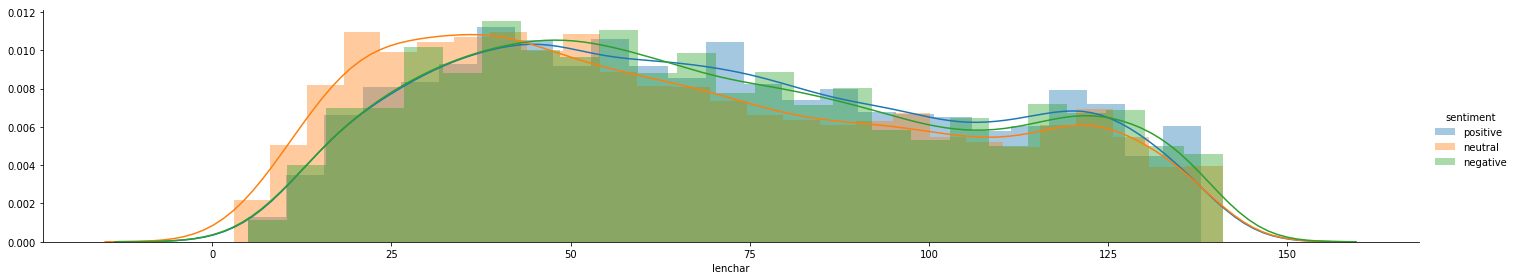

In [34]:
distplot_with_hue(tmp, x='lenchar', hue='sentiment')

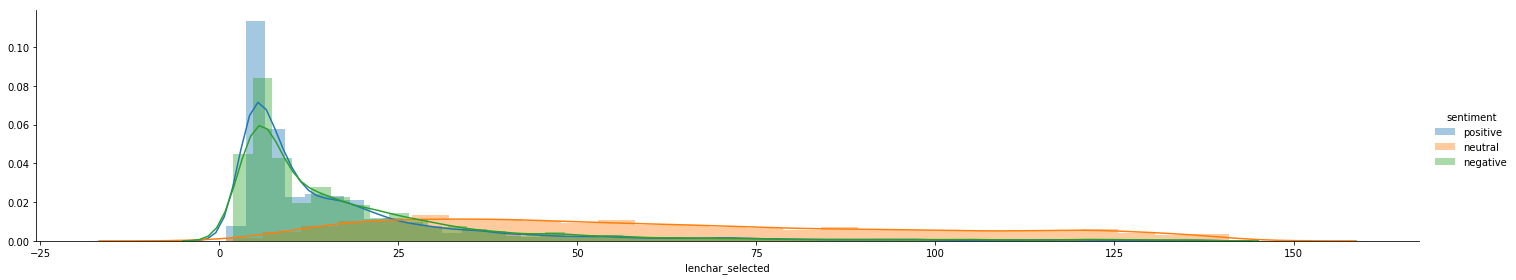

In [35]:
distplot_with_hue(tmp, x='lenchar_selected', hue='sentiment')

In [46]:
lenword_fn = lambda x: len(x.split(' '))
tmp['lenword'] = tmp.text.apply(lenword_fn)
tmp['lenword_selected'] = tmp.selected_text.apply(lenword_fn)

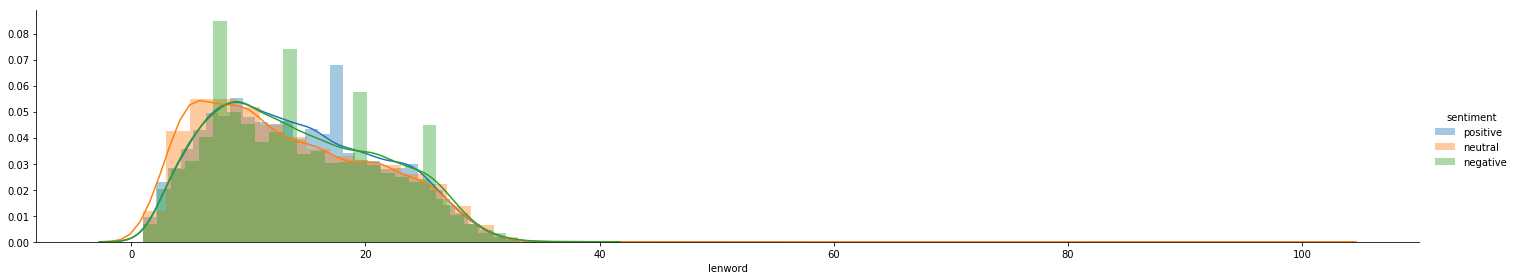

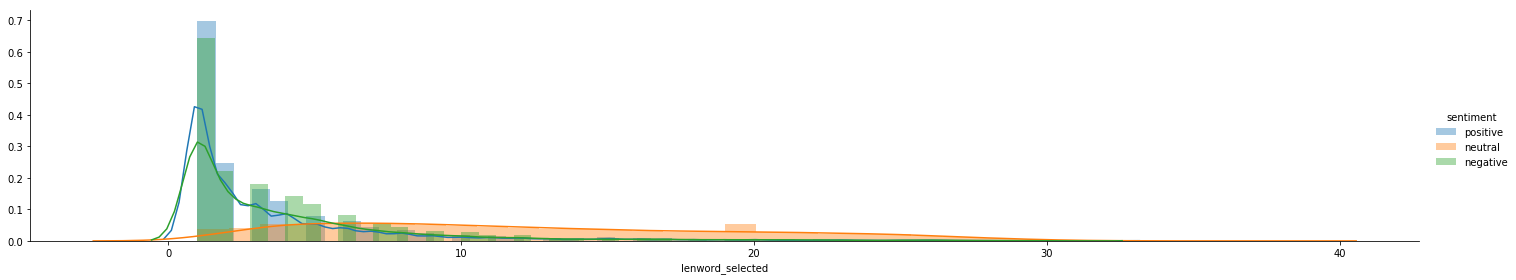

In [48]:
distplot_with_hue(tmp, x='lenword', hue='sentiment')
distplot_with_hue(tmp, x='lenword_selected', hue='sentiment')

In [53]:
tmp.groupby('sentiment')['lenchar'].agg(['min', 'mean', 'median', 'max'])

,min,mean,median,max
sentiment,,,,
negative,5,70.488112,66,141
neutral,3,65.206800,59,141
positive,5,70.419133,67,138


In [54]:
tmp.groupby('sentiment')['lenword'].agg(['min', 'mean', 'median', 'max'])

,min,mean,median,max
sentiment,,,,
negative,1,14.244313,13,38
neutral,1,13.207610,12,101
positive,1,14.100210,13,33


# Private testset not so private